In [124]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import numpy as np
from sklearn.cluster import KMeans

In [125]:
X = pd.read_csv('data_assignment3.csv')
phi = X['phi']
psi = X['psi']




# 1b


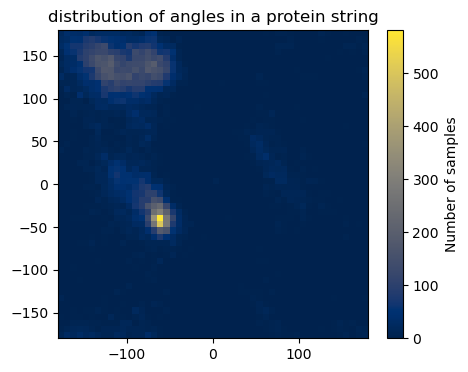

In [126]:
# Set size of the figure
plt.figure(figsize=(5, 4))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(phi, psi, bins=50, cmap='cividis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('distribution of angles in a protein string')

# Show the plot.
plt.show()

# 1c


In [127]:
print(X)

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


In [128]:
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X

X4 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


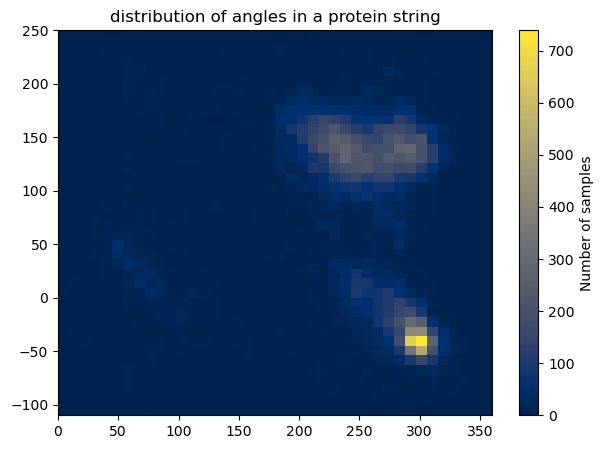

In [129]:
# Set size of the figure
plt.figure(figsize=(7,5))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X4['phi'], X4['psi'], bins=80, cmap='cividis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('distribution of angles in a protein string')

# Show the plot.
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

# 2a


In [132]:
del X4['residue name']
del X4['position']
del X4['chain']
X4

KeyError: 'residue name'

In [169]:
# Perform K-Means clustering    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=30, random_state=4).fit(X4)

/Users/wushmachine/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [170]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[-132.95627139  499.68154847]
 [ 295.13498215  -37.85207968]
 [ 252.18693027  469.5000781 ]
 [ -72.80496152  143.61859106]
 [ 295.33287989  321.43942554]
 [ 286.67681043  142.01068848]
 [-103.61264576    8.52752724]
 [ -65.51268138  322.19378513]
 [ 437.22820328  375.05399957]
 [ 437.90747932   18.36916763]
 [ 256.13937181   10.59685388]
 [ -77.71578498  493.67221686]
 [-118.17703337 -160.5309311 ]
 [ -64.6231165   -37.93077259]
 [  77.06437806  382.72328741]
 [ 218.53790646  158.75079975]
 [ 219.37501996  508.6741325 ]
 [-110.02820177  112.09324141]
 [  77.05259329   18.39918629]
 [ 256.27465743  367.42292268]
 [-104.76586889  375.83123634]
 [ 236.01181792 -160.96540185]
 [ 244.69244211  116.41118061]
 [ 467.5222923   181.49745364]
 [ 286.67204716  501.6361825 ]
 [ 480.76936382  504.37354257]
 [  83.05140894  189.81729927]
 [ 453.71202193 -145.41366635]
 [  76.11153827 -140.90025187]
 [-137.97804793  154.72965118]]


In [171]:
print(kmeans.labels_)

[15  5 21 ...  2 19 16]


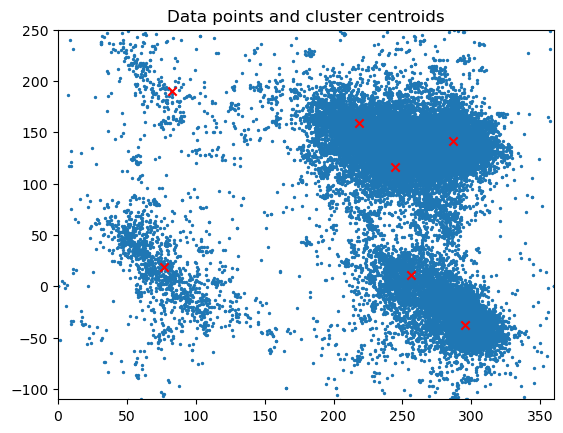

In [176]:
# Plotting the cluster centers and the data points
plt.scatter(X4['phi'], X4['psi'], s=2)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()